## Classification with Python

This project is meant for demonstrating data classification skills with Python. The example dataset to be used contains information on properties of wines (feature variables) and the grape variety (target variable). The aim is to investigate the data and to utilize feature variables to find the most accurate machine learning model to predict the classifications of the grape variety. The fitted model could then be given new wine data and be used to predict grape varieties. (Note: no wine expertise, dataset topic only for project convenience and technical purposes.)

Original source of the dataset: Aeberhard, S. & Forina, M. 1992. Wine [Dataset]. UCI Machine Learning Repository. URL: https://doi.org/10.24432/C5PC7J. Accessed: 4 December 2024.

### Preparations

The libraries to be used are Pandas, Matplotlib, and Seaborn for investigating and visualizing the data, SciPy for testing statistical significance, as well as Scikit-learn for the machine learning models. The models to be included in the analysis are Logistic Regression, Decision Tree, Random Forest, and Gradient Boosting classifier models.

In [1]:
# Importing the basic libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For testing statistical significance
from scipy.stats import pearsonr

# For splitting the dataset into train and test data
from sklearn.model_selection import train_test_split

# Importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# For assessing model accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

### Data review and feature selection

First, the data is brought in and a review of its contents as well as the correlations between the variables is conducted, to determine which few properties should be chosen for training the classification models. While the dataset is available in .data format from the original source, it was converted into .xlsx using Excel's Power Query Editor due to easier understanding. Column headers were also created for the dataset while converting it, according to the wine properties listed in the original source. The .xlsx version was uploaded to Github to ensure later functionality of the project files.

In [2]:
# Opening the data stored in Github repository
df = pd.read_excel('https://github.com/pinjapv/python-classification/raw/refs/heads/main/wine.xlsx')

# Viewing the basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   grape variety         178 non-null    int64  
 1   alcohol               178 non-null    float64
 2   malic acid            178 non-null    float64
 3   ash                   178 non-null    float64
 4   alcalinity of ash     178 non-null    float64
 5   magnesium             178 non-null    int64  
 6   total phenols         178 non-null    float64
 7   flavanoids            178 non-null    float64
 8   nonflavanoid phenols  178 non-null    float64
 9   proanthocyanins       178 non-null    float64
 10  color intensity       178 non-null    float64
 11  hue                   178 non-null    float64
 12  OD280/OD315           178 non-null    float64
 13  proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


The entries in the index range are the wines, with the grape variety and the properties in the columns. There are no missing values in the dataset, which aids the classification process. From the statistical key figures below it can be seen that the value ranges differ greatly between the wine properties, e.g. nonflavanoid phenols' range is 0.13–0.66, while proline's range is 278–1680. There are three grape varieties present, and as seen below regarding their distribution, there are more wines of variety 2 than others.

In [3]:
# Viewing the statistical key figures
df.describe().round(2)

,grape variety,alcohol,malic acid,ash,alcalinity of ash,magnesium,total phenols,flavanoids,nonflavanoid phenols,proanthocyanins,color intensity,hue,OD280/OD315,proline
count,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00,178.00
mean,1.94,13.00,2.34,2.37,19.49,99.74,2.30,2.03,0.36,1.59,5.06,0.96,2.61,746.89
std,0.78,0.81,1.12,0.27,3.34,14.28,0.63,1.00,0.12,0.57,2.32,0.23,0.71,314.91
min,1.00,11.03,0.74,1.36,10.60,70.00,0.98,0.34,0.13,0.41,1.28,0.48,1.27,278.00
25%,1.00,12.36,1.60,2.21,17.20,88.00,1.74,1.20,0.27,1.25,3.22,0.78,1.94,500.50
50%,2.00,13.05,1.87,2.36,19.50,98.00,2.36,2.13,0.34,1.56,4.69,0.96,2.78,673.50
75%,3.00,13.68,3.08,2.56,21.50,107.00,2.80,2.88,0.44,1.95,6.20,1.12,3.17,985.00
max,3.00,14.83,5.80,3.23,30.00,162.00,3.88,5.08,0.66,3.58,13.00,1.71,4.00,1680.00


In [4]:
# Viewing the distribution of the grape varieties
df['grape variety'].value_counts()[df['grape variety'].unique()]

1    59
2    71
3    48
Name: grape variety, dtype: int64

The next task is to choose the best feature variables among the wine properties for the classification models. In this analysis, it will be done based on correlation coefficients, primarily in the context of the target variable while also taking into consideration the correlation among the feature variables themselves to avoid model confusion.

<Axes: >

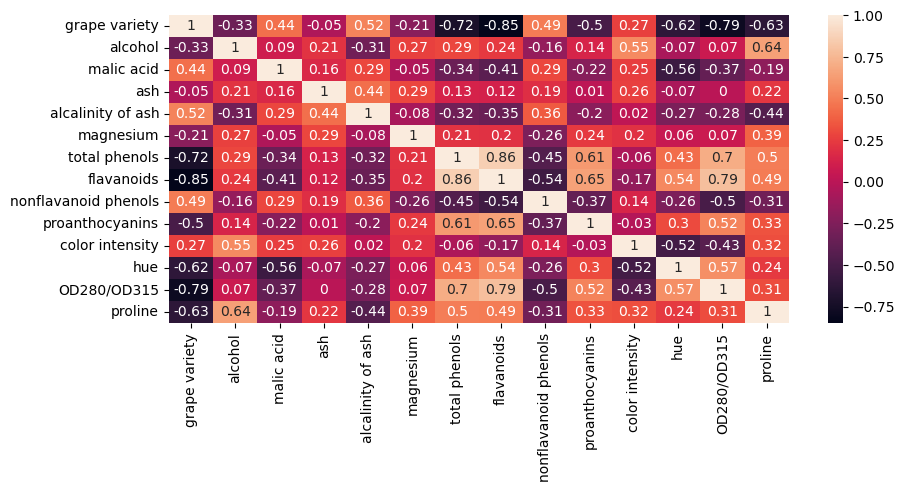

In [5]:
# Calculating correlations into a heatmap
plt.figure(figsize = (10,4))
sns.heatmap(df.corr().round(2), annot = True)

While analyzing the heatmap, the primary focus is on the first column or row, which show the correlations of the feature variables with the target variable. The strongest positive correlations are with alcalinity of ash 0.52=52% and nonflavanoid phenols 0.49=49%. There are several negative correlations, strongest of which are with flavanoids -0.85=85%, OD280/OD315 -0.79=79%, and total phenols -0.72=72%. In contrast, a couple properties have less relevance to identifying the grape variety, weakest of them ash -0.05=5%. However, the three strongest correlating properties also correlate quite a lot with each other, which could create confusion in the models: flavanoids and total phenols 0.86=86%, flavanoids and OD280/OD315 0.79=79%, as well as total phenols and OD280/OD315 0.7=70%.

After examination, better feature variable candidates could be **flavanoids**, **proline**, and **alcalinity of ash**. They all have >50% correlation with the target variable (grape variety) (85%, 63%, 52%), but also <50% correlation with each other (49%, 35%, 44%).

In [6]:
# Testing the correlation coefficients for statistical significance
for var in df:
    df_dropna = df.dropna(subset=[var, 'grape variety'])
    print(var, pearsonr(df_dropna["grape variety"], df_dropna[var]))

grape variety PearsonRResult(statistic=1.0, pvalue=0.0)
alcohol PearsonRResult(statistic=-0.32822194089001927, pvalue=7.723253314615735e-06)
malic acid PearsonRResult(statistic=0.437776204841065, pvalue=9.917703256896814e-10)
ash PearsonRResult(statistic=-0.04964322102407744, pvalue=0.510497749646035)
alcalinity of ash PearsonRResult(statistic=0.5178591098214518, pvalue=1.33539478533115e-13)
magnesium PearsonRResult(statistic=-0.2091793902949302, pvalue=0.005075415772106815)
total phenols PearsonRResult(statistic=-0.7191633405539715, pvalue=1.2340511416926937e-29)
flavanoids PearsonRResult(statistic=-0.8474975401417584, pvalue=2.736652261700284e-50)
nonflavanoid phenols PearsonRResult(statistic=0.48910915886069095, pvalue=4.286739039763851e-12)
proanthocyanins PearsonRResult(statistic=-0.49912982385917043, pvalue=1.3272509181441913e-12)
color intensity PearsonRResult(statistic=0.26566756917598966, pvalue=0.00033824164932687496)
hue PearsonRResult(statistic=-0.6173692102858324, pvalue=4

Many of these p-values in the context of the target variable are quite small and well below the threshold of 0.05, indicating statistical significance: the smallest are the ones with the strongest correlations (flavanoids, total phenols, OD280/OD315). However, in addition to flavanoids 2.74e-50, proline and alcalinity of ash are also statistically significant with 2.23e-21 and 1.34e-13 respectively.

In the cells below, it is possible to view the value distributions and relationships of three wine properties without considering the correlation with the grape varieties, to get more supporting insight in their potential as feature variables for fitting the classification models, or the reasons of possible impact on each other in the calculations.

<Axes: xlabel='grape variety', ylabel='alcalinity of ash'>

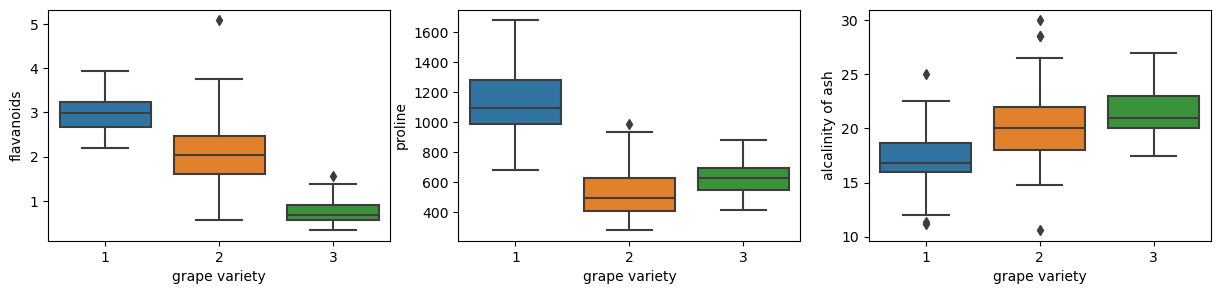

In [7]:
# Viewing the candidate feature variables in box charts
fig, axes = plt.subplots(1, 3, figsize = (15,3))
sns.boxplot(x = 'grape variety', y = 'flavanoids', data = df, ax = axes[0])
sns.boxplot(x = 'grape variety', y = 'proline', data = df, ax = axes[1])
sns.boxplot(x = 'grape variety', y = 'alcalinity of ash', data = df, ax = axes[2])

For the example of flavanoids, proline, and alcalinity of ash here, it is visible in the box charts that all three grape varieties appear in different ways regarding each property: while the mean values of flavanoids decrease throughout the grape varieties, it is the opposite for alcalinity of ash. The mean values of proline are also different from the other two.

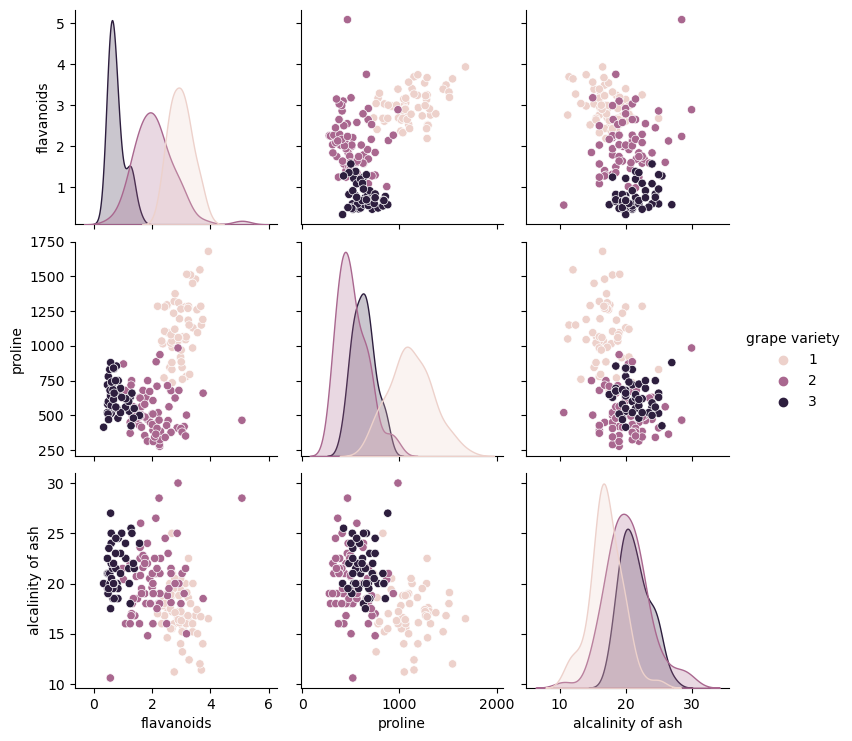

In [8]:
# Comparing with scatter charts as well
sns.pairplot(df[['flavanoids', 'proline', 'alcalinity of ash', 'grape variety']], hue = 'grape variety')

As seen in the scatter charts, the majorities of the property peak values are distinct between the grape varieties, except with alcalinity of ash where grape varieties 2 and 3 appear quite similar in values, which may affect the classification. 

### Model fitting

Next, the feature variables (X) and target variable (y) are defined for the classification models. The original dataset is then split into train and test data. In the cell below, it is possible to test which feature variables make the best combination for resulting in highest overall model accuracies. After testing a couple of combinations, the following three were chosen as examples here: **flavanoids**, **proline**, and **alcalinity of ash** due to their high correlation with the grape varieties while also relatively low correlation with each other. While splitting, some parameters can be defined and they may impact the models' accuracies:
- **test_size**: It determines the split size between the train and test data. After a couple of tests, the 75–25 solution was chosen here.
- **random_state**: It helps keep the calculations same in case the cell is run several times (without restarting the kernel). It also has a slight effect on the model accuracy results later in terms of accuracy differences between the train data and test data. After testing, value 2 was chose as example here.

In [9]:
# Defining the feature variables
X = df[['flavanoids', 'proline', 'alcalinity of ash']]

# Defining the target variable
y = df['grape variety']

# Splitting both the feature and target variables into train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 2)

Next, the four classification models can be fitted. In the cell below, it is possible to test different parameters for each model, and see how it impacts the accuracies regarding both train and test data. The following parameter values were chosen in relation to the chosen feature variables:
- **max_depth**: It helps in some models to define how deeply they can branch out: for Decision Tree, the parameter 4 will result in four branching levels at most, which gave the best accuracies when combined with the other settings. And since the ensemble models Random Forest and Gradient Boosting also include decision tree, they need this parameter as well. However, since they combine the tree with other models, for them max_depth 3 gave the best accuracies.
- **max_iter**: For Logistic Regression, if the parameter was not given or too small, a notice appeared that the parameter had to be increased due to convergence reasons. After testing, the value 170 was enough iterations to resolve the issue.
- **random_state**: For the models using decision tree, the value 3 gave the best accuracies when combined with the other settings.

In [10]:
# Fitting the models with train data
model1 = LogisticRegression(max_iter = 170)
model1.fit(X_train, y_train)
model2 = DecisionTreeClassifier(max_depth = 4, random_state = 3)
model2.fit(X_train, y_train)
model3 = RandomForestClassifier(max_depth = 3, random_state = 3)
model3.fit(X_train, y_train)
model4 = GradientBoostingClassifier(max_depth = 3, random_state = 3)
model4.fit(X_train, y_train)

GradientBoostingClassifier(random_state=3)

### Model accuracy

Next, the models are used for predictions for the train and test data, and evaluating how accurate they are. As mentioned above, when testing different feature variables as well as parameters, very differing accuracy levels were received (between ~65-100%), and the chosen parameters here resulted in the highest accuracy levels with test data.

In [11]:
# Calculating predictions with each model for train data and test data
y_train_model1 = model1.predict(X_train)
y_test_model1 = model1.predict(X_test)
y_train_model2 = model2.predict(X_train)
y_test_model2 = model2.predict(X_test)
y_train_model3 = model3.predict(X_train)
y_test_model3 = model3.predict(X_test)
y_train_model4 = model4.predict(X_train)
y_test_model4 = model4.predict(X_test)

In [12]:
# Calculating % of correct predictions for train data
print('Accuracy of predictions with train data:')
print(f'Logistic Regression {accuracy_score(y_train, y_train_model1):.3f}')
print(f'Decision Tree {accuracy_score(y_train, y_train_model2):.3f}')
print(f'Random Forest {accuracy_score(y_train, y_train_model3):.3f}')
print(f'Gradient Boosting {accuracy_score(y_train, y_train_model4):.3f}')

# Calculating % of correct predictions for test data
print('Accuracy of predictions with test data:')
print(f'Logistic Regression {accuracy_score(y_test, y_test_model1):.3f}')
print(f'Decision Tree {accuracy_score(y_test, y_test_model2):.3f}')
print(f'Random Forest {accuracy_score(y_test, y_test_model3):.3f}')
print(f'Gradient Boosting {accuracy_score(y_test, y_test_model4):.3f}')

Accuracy of predictions with train data:
Logistic Regression 0.932
Decision Tree 0.985
Random Forest 0.955
Gradient Boosting 1.000
Accuracy of predictions with test data:
Logistic Regression 0.867
Decision Tree 0.889
Random Forest 0.911
Gradient Boosting 0.933


As a result of selecting the specific feature variables, and fitting the models with specific parameter values, the accuracies of predictions became highest for Gradient Boosting, and lowest for Logistic Regression albeit still very good. In the cells below, it is possible to investigate any of the models' prediction results further with classification reports and confusion matrices, by defining the model number in the code. The Gradient Boosting model was chosen here as an example (model4), because it had the highest accuracy for both test and train data.

Text(0.5, 1.0, 'Classification results with test data')

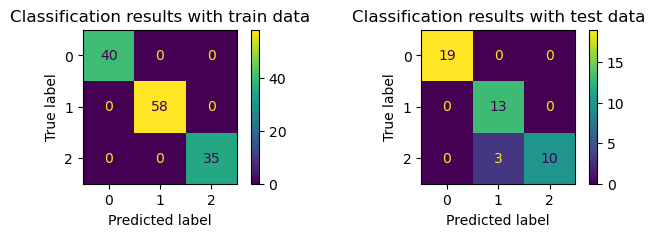

In [13]:
# Calculating the confusion matrices for the chosen model's train and test data results
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(8,2))
cm1 = confusion_matrix(y_train, y_train_model4)
ConfusionMatrixDisplay(confusion_matrix = cm1).plot(ax=axs[0])
cm2 = confusion_matrix(y_test, y_test_model4)
ConfusionMatrixDisplay(confusion_matrix = cm2).plot(ax=axs[1])
axs[0].set_title('Classification results with train data')
axs[1].set_title('Classification results with test data')

Y-axis shows the true grape variety labels for the wine entries in the original dataset, and x-axis shows the
labels that the chosen model predicted (due to Python, variety 1=0, variety 2=1, variety 3=2):
- The Gradient Boosting model had no errors with train data.
- With test data, the model only mistakenly classified 3 wines with grape variety 2 instead of the correct 3. One possible reason for this could be the similar value ranges of alcalinity of ash for varieties 2 and 3.

In [14]:
# Producing the classification report for the chosen model's test data results
print(classification_report(y_test, y_test_model4))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       0.81      1.00      0.90        13
           3       1.00      0.77      0.87        13

    accuracy                           0.93        45
   macro avg       0.94      0.92      0.92        45
weighted avg       0.95      0.93      0.93        45



The report above can be examined in connection with the test data's confusion matrix: 45 wines in total were included in the test data (45/178 = 25%). Of these, 19+13+10 were correctly classified, resulting in 93% accuracy ((19+13+10)/45). Here also the grape variety-specific accuracy-% can be seen:
- Grape variety 1: 19 were classified as variety 1 -> 19/19 = 100% accuracy
- Grape variety 2: 13 were classified as variety 2 -> 13/13 = 100% accuracy
- Grape variety 3: 10+3 were classified as variety 3 -> 10/13 = 77% accuracy

In principal, the Gradient Boosting model was able to be fitted quite well and it was possible to achieve a high level of accuracy (the same goes for the other models as well, which might also be due to the nature of the data source). This fitted model could now be given new wine data, and utilized for predicting the classification of the grape varieties based on the chosen properties.